In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from experiments.utils.smooth_running_mean import smooth_running_mean
from definitions import PROJECT_ROOT

In [4]:
names_list = ['trio', 'quartet', 'quintet', 'sextet', 'septet', 'octet','nonet', 'decet',
               'duodecet','quindecet', 'vigintet','trigintet','quinquagintet']
ntet_sizes = [3,4,5,6,7,8,9,10,12,15,20,30,50]
base_path = Path(PROJECT_ROOT).joinpath('experiments/stochastic_ntet_descent/result_data')
file_names= ['coil20','rna N3k', '3d cube of 30^3 points - 3000 points sampled']

In [5]:
#cube
all_sizes_results = np.zeros((len(ntet_sizes), 3, 5)) # 3 for - time, stress, average quartet stress
path_to_file =  Path(base_path).joinpath(file_names[1])

for i, name in enumerate(names_list):
    results_file = Path(path_to_file).joinpath(f'Stochastic {name} ({ntet_sizes[i]}) descent.npy')
    results = np.load(results_file)
    print(results)
    all_sizes_results[i,:,:] = results[:,:,None].T




[[-6.08292657e+01  6.03379246e-01  2.04154745e-02]
 [-6.67766594e+01  6.09287480e-01  2.04831021e-02]
 [-5.91226002e+01  5.99279283e-01  2.03614384e-02]
 [-5.88817146e+01  6.08042935e-01  2.02964607e-02]
 [-8.10004615e+01  6.02000693e-01  2.05263043e-02]]
[[-4.69759374e+01  1.85730447e+00  1.19101139e-02]
 [-4.67763769e+01  1.86114568e+00  1.20841068e-02]
 [-4.67008559e+01  1.85384428e+00  1.21406815e-02]
 [-4.67579986e+01  1.86038391e+00  1.21750317e-02]
 [-6.51156701e+01  1.85820781e+00  1.19104068e-02]]
[[-4.43442128e+01  3.10744325e+00  7.89652201e-03]
 [-4.43827998e+01  3.10594823e+00  7.93840076e-03]
 [-4.42560297e+01  3.10679102e+00  7.88123729e-03]
 [-4.42397038e+01  3.11190956e+00  7.83190273e-03]
 [-6.21785369e+01  3.10546490e+00  7.79888723e-03]]
[[-4.06111502e+01  3.87888630e+00  5.44507266e-03]
 [-4.05759419e+01  3.87857829e+00  5.42119553e-03]
 [-4.04574204e+01  3.87756404e+00  5.45765278e-03]
 [-4.05613493e+01  3.87793158e+00  5.42878705e-03]
 [-5.76291965e+01  3.8802679

In [16]:
print(all_sizes_results)

[[[-6.08292657e+01 -6.67766594e+01 -5.91226002e+01 -5.88817146e+01
   -8.10004615e+01]
  [ 6.03379246e-01  6.09287480e-01  5.99279283e-01  6.08042935e-01
    6.02000693e-01]
  [ 2.04154745e-02  2.04831021e-02  2.03614384e-02  2.02964607e-02
    2.05263043e-02]]

 [[-4.69759374e+01 -4.67763769e+01 -4.67008559e+01 -4.67579986e+01
   -6.51156701e+01]
  [ 1.85730447e+00  1.86114568e+00  1.85384428e+00  1.86038391e+00
    1.85820781e+00]
  [ 1.19101139e-02  1.20841068e-02  1.21406815e-02  1.21750317e-02
    1.19104068e-02]]

 [[-4.43442128e+01 -4.43827998e+01 -4.42560297e+01 -4.42397038e+01
   -6.21785369e+01]
  [ 3.10744325e+00  3.10594823e+00  3.10679102e+00  3.11190956e+00
    3.10546490e+00]
  [ 7.89652201e-03  7.93840076e-03  7.88123729e-03  7.83190273e-03
    7.79888723e-03]]

 [[-4.06111502e+01 -4.05759419e+01 -4.04574204e+01 -4.05613493e+01
   -5.76291965e+01]
  [ 3.87888630e+00  3.87857829e+00  3.87756404e+00  3.87793158e+00
    3.88026793e+00]
  [ 5.44507266e-03  5.42119553e-03  5

[[6.53221403e+01 6.04397927e-01 2.04165560e-02]
 [5.04653678e+01 1.85817723e+00 1.20440681e-02]
 [4.78802566e+01 3.10751139e+00 7.86939001e-03]
 [4.39670117e+01 3.87864563e+00 5.43730116e-03]
 [4.41415798e+01 4.20038618e+00 3.98460773e-03]
 [4.43716212e+01 4.31780174e+00 3.05597529e-03]
 [4.63709400e+01 4.36274476e+00 2.42851370e-03]
 [4.93102616e+01 4.38210323e+00 1.98051088e-03]
 [5.54578348e+01 4.39592922e+00 1.39509301e-03]
 [6.99990765e+01 4.40138447e+00 9.10175641e-04]
 [9.84872580e+01 4.40591711e+00 5.78276886e-04]
 [2.02269781e+02 4.42003347e+00 3.63196826e-04]
 [6.71828965e+02 4.43616465e+00 1.73118275e-04]]


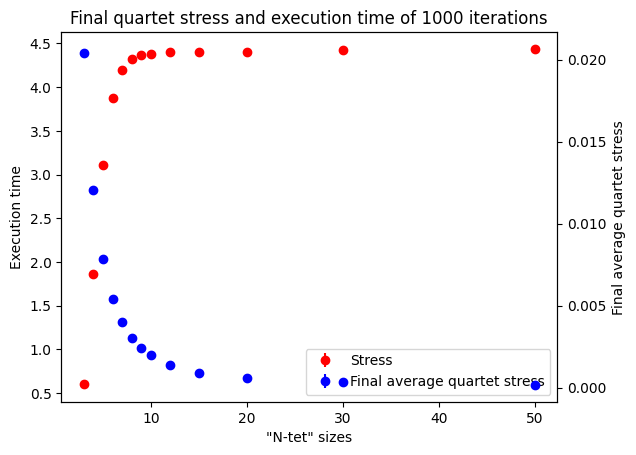

In [6]:



# Create a new figure and axis
fig, ax = plt.subplots()
all_sizes_results[:,0,:] = all_sizes_results[:,0,:] * (-1) # correct mistakenly recoded time (start - finish instead of the other way round)
means = np.mean(all_sizes_results, axis=2)
ranges = np.max(all_sizes_results, axis=2) - np.min(all_sizes_results, axis=2)

print(means)


line1 = ax.errorbar(ntet_sizes, means[:,1], yerr=ranges[:,1], fmt='o', c='r', label='Stress')

ax2 = ax.twinx()
line2 = ax2.errorbar(ntet_sizes, means[:,2], yerr=ranges[:,2], fmt='o', c='b', label='Final average quartet stress')
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax.legend(lines,labels)

# Add axis labels and title
ax.set_xlabel('\"N-tet\" sizes')
ax.set_ylabel('Execution time')
ax2.set_ylabel("Final average quartet stress")
ax.set_title('Final quartet stress and execution time of 1000 iterations')
# plt.xscale('log')

# Show the plot
plt.show()
